In [299]:
import glob

In [300]:
data_path = r"E:\Batteries\Battery Data\LG data\LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020"

__Listing all CSV files__

In [301]:
csv_file_list = []

folders = os.listdir(data_path)

for folder in folders:
    
    d = os.path.join(data_path,folder)
    
    if os.path.isdir(d):
        
#         print('\n')
#         print(d)
        files = glob.glob(d + "/*.csv")
#         print(files)
    
        csv_file_list.append(files)
        
csv_files = [all_files for folder in csv_file_list for all_files in folder]

__Choice of the folder for exploring the data__

In [126]:
folder_option = csv_file_list[3]

__Cleaning the imported data__

In [127]:
i = 0

df = pd.read_csv(folder_option[i], header=[25,26], index_col=0, parse_dates=True)
df.drop(df.columns[-1], axis = 1,inplace = True)
df.columns = df.columns.droplevel(-1)

In [128]:
for i in np.arange(1,len(folder_option),1):
    
    df2 = pd.read_csv(folder_option[i], header=[25,26], index_col=0, parse_dates=True)
    df2.drop(df2.columns[-1], axis = 1,inplace = True)
    df2.columns = df2.columns.droplevel(-1)
    
    df = pd.concat([df,df2],axis = 0)    

In [129]:
df_sorted = (df.sort_index())

In the dataset there are some pause and stop values (['PAU','STO']) where the current is zero. We have romoved such values from the dataframe.

In [130]:
df_sorted = df_sorted[~df_sorted['Status'].isin(['PAU','STO'])]

In [131]:
df_sorted['Status'].unique()

array(['DCH', 'CHA', 'TABLE'], dtype=object)

__Understanding the Sequence and Frequency of the cycles__

In [132]:
df3 = pd.DataFrame(df_sorted['Status'])
df3['prev_value'] = df3['Status'].shift(1)
df3['seq_num'] = (df3['Status'] != df3['prev_value']).cumsum()
counts = df3.groupby(['seq_num','Status']).size().reset_index(name="count")

__Understanding the Sequence and Frequency of the Procedure__

In [150]:
df3 = pd.DataFrame(df_sorted['Procedure'])
df3['prev_value'] = df3['Procedure'].shift(1)
df3['seq_num'] = (df3['Procedure'] != df3['prev_value']).cumsum()
counts = df3.groupby(['seq_num','Procedure']).size().reset_index(name="count")

In [151]:
counts

,seq_num,Procedure,count
0,1,HPPC_4pulse,777
1,2,HPPC_Multi_Pulse,28
2,3,HPPC_4pulse,808
3,4,HPPC_Multi_Pulse,34
4,5,HPPC_4pulse,808
5,6,HPPC_Multi_Pulse,94
6,7,HPPC_4pulse,808
7,8,HPPC_Multi_Pulse,94
8,9,HPPC_4pulse,808
9,10,HPPC_Multi_Pulse,94


__Converting Time Index to Seconds__

In [133]:
df_sorted['time_diff_sec'] = (df_sorted.index -df_sorted.index[0]).total_seconds()

In [134]:
df_sorted[df_sorted['Status']=='DCH'].head()

Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,time_diff_sec
2018-11-02 18:30:23,2,DCH,03:29:33.069,00:00:00.199,1,1,HPPC_4pulse,4.13171,-3.00106,38.17255,-0.00008,-0.00034,12.0,0.0
2018-11-02 18:30:23,2,DCH,03:29:32.971,00:00:00.101,1,1,HPPC_4pulse,4.14722,-3.00361,38.17255,0.00000,0.00000,12.0,0.0
2018-11-02 18:30:24,2,DCH,03:29:34.071,00:00:01.201,1,1,HPPC_4pulse,4.12042,-2.99850,38.17255,-0.00092,-0.00378,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.972,00:00:01.102,1,1,HPPC_4pulse,4.12092,-2.99850,38.17255,-0.00083,-0.00343,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.870,00:00:01.000,1,1,HPPC_4pulse,4.12126,-2.99850,38.17255,-0.00075,-0.00308,12.0,1.0


In [141]:
df_sorted['time_diff_sec'][:1000]

2018-11-02 18:30:23       0.0
2018-11-02 18:30:23       0.0
2018-11-02 18:30:24       1.0
2018-11-02 18:30:24       1.0
2018-11-02 18:30:24       1.0
                        ...  
2018-11-02 20:20:32    6609.0
2018-11-02 20:20:32    6609.0
2018-11-02 20:20:33    6610.0
2018-11-02 20:20:33    6610.0
2018-11-02 20:20:33    6610.0
Name: time_diff_sec, Length: 1000, dtype: float64

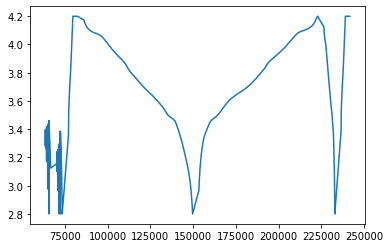

In [149]:
plt.plot(df_sorted['time_diff_sec'][8000:12000],df_sorted['Voltage'][8000:12000])
plt.show()

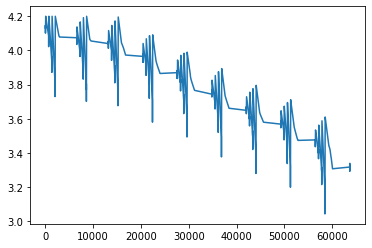

In [169]:
plt.plot(df_sorted['time_diff_sec'][:8000],df_sorted['Voltage'][:8000])
plt.show()

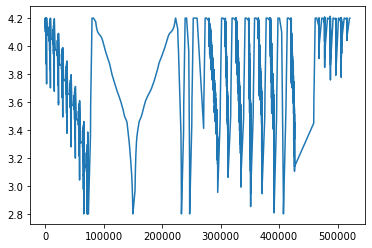

In [148]:
plt.plot(df_sorted['time_diff_sec'],df_sorted['Voltage'])
plt.show()

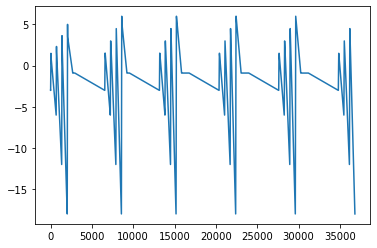

In [143]:
plt.plot(df_sorted['time_diff_sec'][:5000],df_sorted['Current'][:5000])
plt.show()

In [ ]:
plt.plot(df_sorted['time_diff_sec'][:5000],df_sorted['Current'][:5000])
plt.show()

In [156]:
dum = df_sorted[df_sorted['Procedure'].isin(['HPPC_4pulse'])]

In [157]:
dum.columns

Index(['Step', 'Status', 'Prog Time', 'Step Time', 'Cycle', 'Cycle Level',
       'Procedure', 'Voltage', 'Current', 'Temperature', 'Capacity', 'WhAccu',
       'Cnt', 'time_diff_sec'],
      dtype='object', name='Time Stamp')

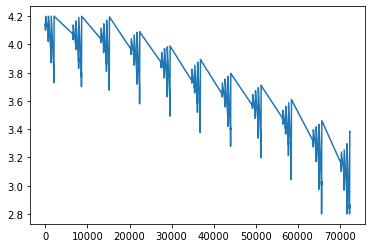

In [160]:
plt.plot(dum['time_diff_sec'],dum['Voltage'])

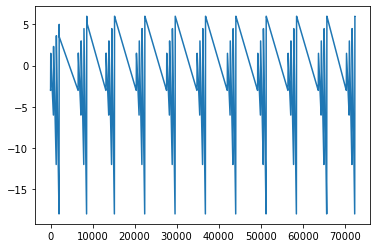

In [173]:
plt.plot(dum['time_diff_sec'],dum['Current'])

In [161]:
dum2 = df_sorted[df_sorted['Procedure'].isin(['HPPC_Multi_Pulse'])]

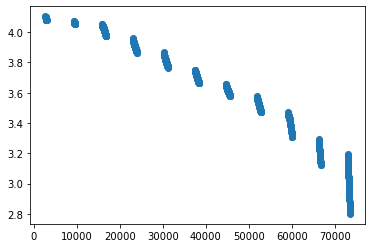

In [163]:
plt.scatter(dum2['time_diff_sec'],dum2['Voltage'])

In [166]:
dum2['Voltage'][:50]

2018-11-02 19:15:01    4.10474
2018-11-02 19:15:11    4.10188
2018-11-02 19:15:21    4.09969
2018-11-02 19:15:31    4.09800
2018-11-02 19:15:41    4.09648
2018-11-02 19:15:51    4.09513
2018-11-02 19:16:01    4.09395
2018-11-02 19:16:11    4.09277
2018-11-02 19:16:21    4.09176
2018-11-02 19:16:31    4.09075
2018-11-02 19:16:41    4.08991
2018-11-02 19:16:51    4.08890
2018-11-02 19:17:01    4.08805
2018-11-02 19:17:11    4.08721
2018-11-02 19:17:21    4.08654
2018-11-02 19:17:31    4.08569
2018-11-02 19:17:41    4.08502
2018-11-02 19:17:51    4.08435
2018-11-02 19:18:01    4.08367
2018-11-02 19:18:11    4.08283
2018-11-02 19:18:21    4.08232
2018-11-02 19:18:31    4.08165
2018-11-02 19:18:41    4.08098
2018-11-02 19:18:51    4.08030
2018-11-02 19:19:01    4.07980
2018-11-02 19:19:11    4.07912
2018-11-02 19:19:21    4.07845
2018-11-02 19:19:23    4.07845
2018-11-02 21:04:14    4.07255
2018-11-02 21:04:24    4.07019
2018-11-02 21:04:34    4.06867
2018-11-02 21:04:44    4.06749
2018-11-

# Visualizing the Cycles

In [190]:
df_sorted['Procedure'].unique()

array(['HPPC_4pulse', 'HPPC_Multi_Pulse', 'NN_Char_Charge',
       'LG_HG2_NN_Char', 'LG_HG2_CyclesA', 'LG_HG2_CyclesB'], dtype=object)

__HPPC 4pulse Cycle__

In [191]:
hppc_4pulse = df_sorted[df_sorted['Procedure'].isin(['HPPC_4pulse'])]

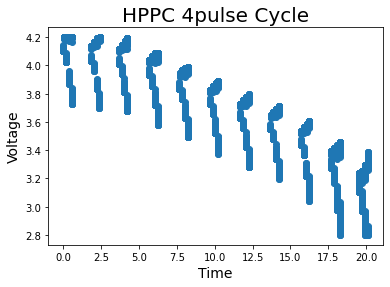

In [233]:
plt.scatter(hppc_4pulse['time_diff_sec']/3600,hppc_4pulse['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC 4pulse Cycle',size = 20)
plt.show()

__HPPC Multipulse Cycle__

In [211]:
hppc_multi_pulse = df_sorted[df_sorted['Procedure'].isin(['HPPC_Multi_Pulse'])]

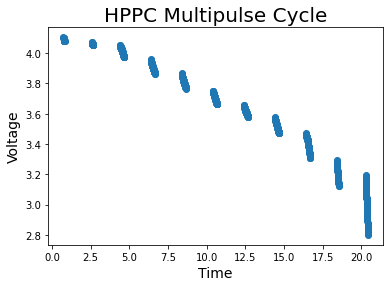

In [234]:
plt.scatter(hppc_multi_pulse['time_diff_sec']/3600,hppc_multi_pulse['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

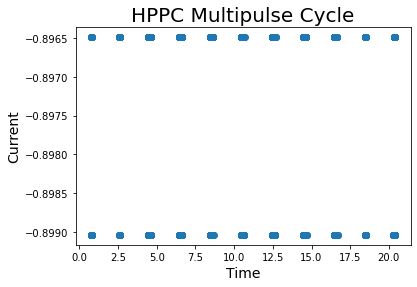

In [269]:
plt.scatter(hppc_multi_pulse['time_diff_sec']/3600,hppc_multi_pulse['Current'])
plt.ylabel('Current',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

__NN_Char_Charge__

In [195]:
nn_char_charge = df_sorted[df_sorted['Procedure'].isin(['NN_Char_Charge'])]

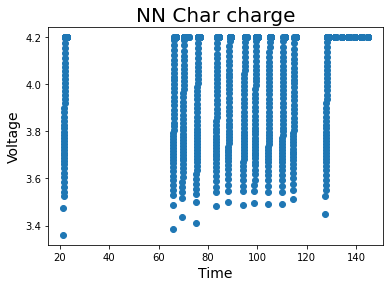

In [235]:
plt.scatter(nn_char_charge['time_diff_sec']/3600,nn_char_charge['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('NN Char charge',size = 20)
plt.show()

__LG_HG2_NN_Char__

In [237]:
lg_hg2_nn_char = df_sorted[df_sorted['Procedure'].isin(['LG_HG2_NN_Char'])]

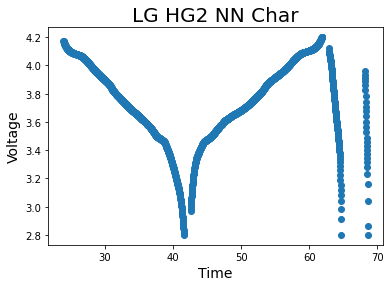

In [238]:
plt.scatter(lg_hg2_nn_char['time_diff_sec']/3600,lg_hg2_nn_char['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('LG HG2 NN Char',size = 20)
plt.show()

__LG_HG2_CyclesA__

In [199]:
lg_hg2_cyclesA = df_sorted[df_sorted['Procedure'].isin(['LG_HG2_CyclesA'])]

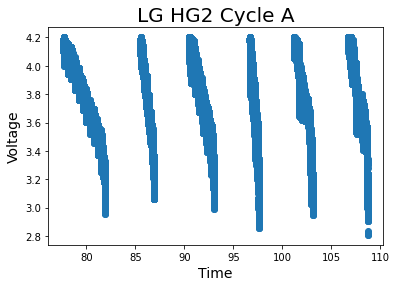

In [239]:
plt.scatter(lg_hg2_cyclesA['time_diff_sec']/3600,lg_hg2_cyclesA['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('LG HG2 Cycle A',size = 20)
plt.show()

__LG_HG2_CyclesB__

In [201]:
lg_hg2_cyclesB = df_sorted[df_sorted['Procedure'].isin(['LG_HG2_CyclesB'])]

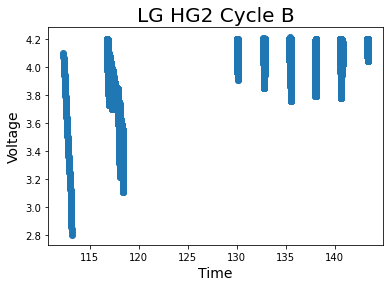

In [240]:
plt.scatter(lg_hg2_cyclesB['time_diff_sec']/3600,lg_hg2_cyclesB['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('LG HG2 Cycle B',size = 20)
plt.show()

__Overall Cycle__

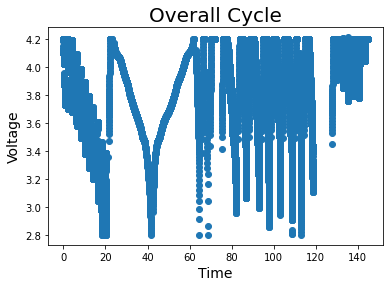

In [241]:
plt.scatter(df_sorted['time_diff_sec']/3600,df_sorted['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('Overall Cycle',size = 20)
plt.show()

In [221]:
df['time_diff_sec'] = (df.index -df.index[0]).total_seconds()

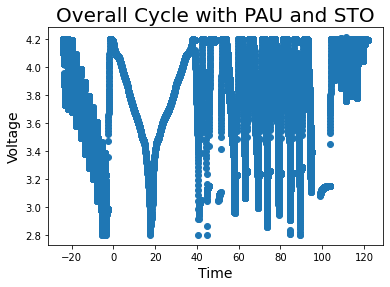

In [242]:
plt.scatter(df[df['Voltage']>1]['time_diff_sec']/3600,df[df['Voltage']>1]['Voltage'])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('Overall Cycle with PAU and STO',size = 20)
plt.show()

In [230]:
df['Status'].unique()

array(['DCH', 'PAU', 'CHA', 'STO', 'TABLE'], dtype=object)

# Visualizing the cycles in charging

__HPPC 4pulse Cycle__

In [245]:
hppc_4pulse[hppc_4pulse['Status']=='CHA']

Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,time_diff_sec
2018-11-02 18:31:13,4,CHA,03:30:22.977,00:00:00.100,1,1,HPPC_4pulse,4.18529,0.85307,38.27771,-0.00831,-0.03418,12.0,50.0
2018-11-02 18:31:14,4,CHA,03:30:23.978,00:00:01.101,1,1,HPPC_4pulse,4.19995,1.47372,38.27771,-0.00791,-0.03247,12.0,51.0
2018-11-02 18:31:14,4,CHA,03:30:23.879,00:00:01.002,1,1,HPPC_4pulse,4.19995,1.48649,38.27771,-0.00795,-0.03265,12.0,51.0
2018-11-02 18:31:14,4,CHA,03:30:23.777,00:00:00.900,1,1,HPPC_4pulse,4.19979,1.49416,38.27771,-0.00799,-0.03282,12.0,51.0
2018-11-02 18:31:14,4,CHA,03:30:23.679,00:00:00.802,1,1,HPPC_4pulse,4.19962,1.49671,38.27771,-0.00803,-0.03300,12.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-03 14:36:56,25,CHA,23:36:02.343,00:00:09.601,2,1,HPPC_4pulse,3.38242,5.99706,38.59318,-2.55571,-9.22911,12.0,72393.0
2018-11-03 14:36:56,25,CHA,23:36:02.141,00:00:09.399,2,1,HPPC_4pulse,3.38090,5.99706,38.59318,-2.55604,-9.23024,12.0,72393.0
2018-11-03 14:36:56,25,CHA,23:36:02.042,00:00:09.300,2,1,HPPC_4pulse,3.38006,5.99961,38.59318,-2.55621,-9.23080,12.0,72393.0
2018-11-03 14:36:56,25,CHA,23:36:01.945,00:00:09.203,2,1,HPPC_4pulse,3.37938,5.99706,38.59318,-2.55637,-9.23135,12.0,72393.0


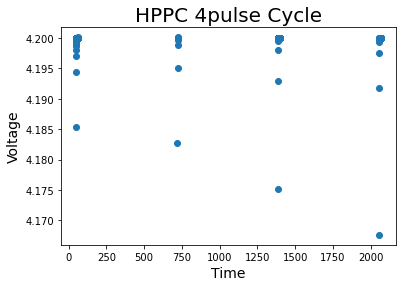

In [256]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'][:350])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC 4pulse Cycle',size = 20)
plt.show()

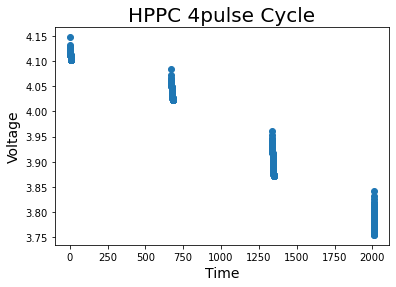

In [257]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'][:350])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC 4pulse Cycle',size = 20)
plt.show()

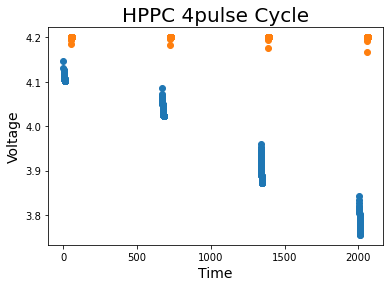

In [260]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'][:350])
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'][:350])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC 4pulse Cycle',size = 20)
plt.show()

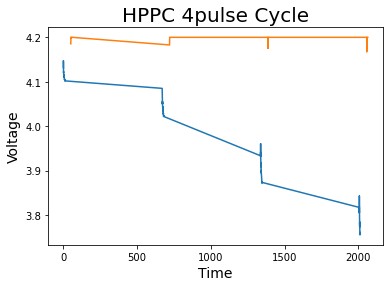

In [270]:
plt.plot(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'][:350])
plt.plot(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'][:350])
plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC 4pulse Cycle',size = 20)
plt.show()

In [ ]:
hppc_multi_pulse

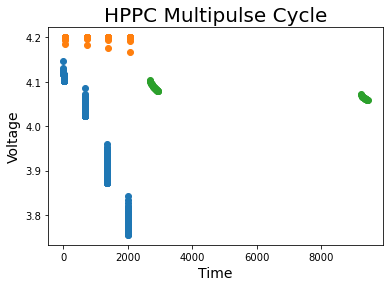

In [267]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'][:350])
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'][:350])
plt.scatter(hppc_multi_pulse['time_diff_sec'][:50],hppc_multi_pulse['Voltage'][:50])

plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

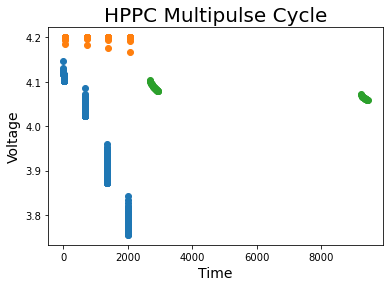

In [267]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'][:350])
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'][:350],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'][:350])
plt.scatter(hppc_multi_pulse['time_diff_sec'][:50],hppc_multi_pulse['Voltage'][:50])

plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

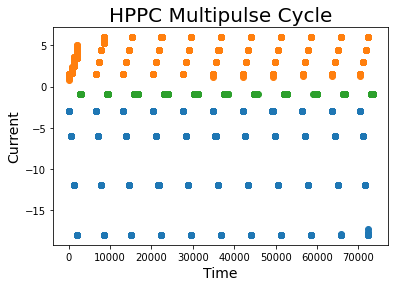

In [272]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Current'])
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Current'])
plt.scatter(hppc_multi_pulse['time_diff_sec'],hppc_multi_pulse['Current'])

plt.ylabel('Current',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

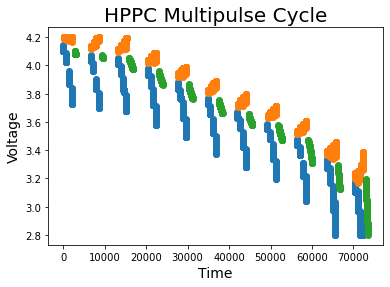

In [275]:
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'])
plt.scatter(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'])
plt.scatter(hppc_multi_pulse['time_diff_sec'],hppc_multi_pulse['Voltage'])

plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

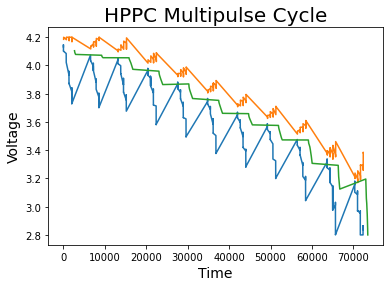

In [276]:
plt.plot(hppc_4pulse[hppc_4pulse['Status']=='DCH']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='DCH']['Voltage'])
plt.plot(hppc_4pulse[hppc_4pulse['Status']=='CHA']['time_diff_sec'],hppc_4pulse[hppc_4pulse['Status']=='CHA']['Voltage'])
plt.plot(hppc_multi_pulse['time_diff_sec'],hppc_multi_pulse['Voltage'])

plt.ylabel('Voltage',size = 14)
plt.xlabel('Time',size = 14)
plt.title('HPPC Multipulse Cycle',size = 20)
plt.show()

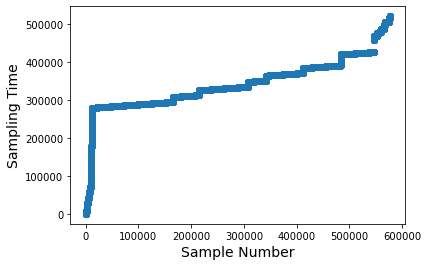

In [282]:
plt.scatter(range(len(df_sorted)),df_sorted['time_diff_sec'])
plt.ylabel('Sampling Time',size = 14)
plt.xlabel('Sample Number',size = 14)
plt.show()

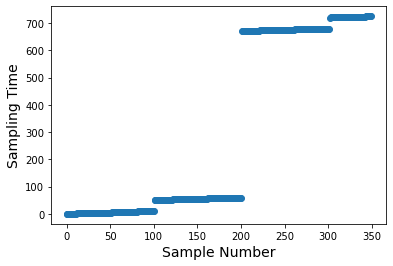

In [285]:
plt.scatter(range(len(df_sorted[:350])),df_sorted['time_diff_sec'][:350])
plt.ylabel('Sampling Time',size = 14)
plt.xlabel('Sample Number',size = 14)
plt.show()

In [283]:
df_sorted.head(25)

Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,time_diff_sec
2018-11-02 18:30:23,2,DCH,03:29:33.069,00:00:00.199,1,1,HPPC_4pulse,4.13171,-3.00106,38.17255,-0.00008,-0.00034,12.0,0.0
2018-11-02 18:30:23,2,DCH,03:29:32.971,00:00:00.101,1,1,HPPC_4pulse,4.14722,-3.00361,38.17255,0.00000,0.00000,12.0,0.0
2018-11-02 18:30:24,2,DCH,03:29:34.071,00:00:01.201,1,1,HPPC_4pulse,4.12042,-2.99850,38.17255,-0.00092,-0.00378,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.972,00:00:01.102,1,1,HPPC_4pulse,4.12092,-2.99850,38.17255,-0.00083,-0.00343,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.870,00:00:01.000,1,1,HPPC_4pulse,4.12126,-2.99850,38.17255,-0.00075,-0.00308,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.773,00:00:00.903,1,1,HPPC_4pulse,4.12177,-2.99850,38.17255,-0.00075,-0.00308,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.669,00:00:00.799,1,1,HPPC_4pulse,4.12227,-2.99850,38.17255,-0.00058,-0.00240,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.472,00:00:00.602,1,1,HPPC_4pulse,4.12345,-2.99850,38.17255,-0.00042,-0.00171,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.372,00:00:00.502,1,1,HPPC_4pulse,4.12429,-2.99850,38.17255,-0.00033,-0.00136,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.272,00:00:00.402,1,1,HPPC_4pulse,4.12531,-2.99850,38.17255,-0.00033,-0.00136,12.0,1.0


In [290]:
dum = df_sorted[~df_sorted.index.duplicated(keep = 'first')]

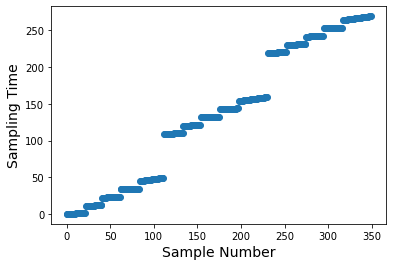

In [293]:
plt.scatter(range(len(dum[:350])),dum['time_diff_sec'][:350]/60)
plt.ylabel('Sampling Time',size = 14)
plt.xlabel('Sample Number',size = 14)
plt.show()

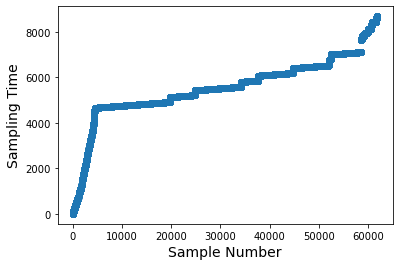

In [294]:
plt.scatter(range(len(dum)),dum['time_diff_sec']/60)
plt.ylabel('Sampling Time',size = 14)
plt.xlabel('Sample Number',size = 14)
plt.show()

In [296]:
dum[dum['Status'] == 'DCH']

Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,time_diff_sec
2018-11-02 18:30:23,2,DCH,03:29:33.069,00:00:00.199,1,1,HPPC_4pulse,4.13171,-3.00106,38.17255,-0.00008,-0.00034,12.0,0.0
2018-11-02 18:30:24,2,DCH,03:29:34.071,00:00:01.201,1,1,HPPC_4pulse,4.12042,-2.99850,38.17255,-0.00092,-0.00378,12.0,1.0
2018-11-02 18:30:25,2,DCH,03:29:34.671,00:00:01.801,1,1,HPPC_4pulse,4.11823,-3.00106,38.17255,-0.00142,-0.00584,12.0,2.0
2018-11-02 18:30:26,2,DCH,03:29:36.071,00:00:03.201,1,1,HPPC_4pulse,4.11401,-3.00106,38.17255,-0.00258,-0.01063,12.0,3.0
2018-11-02 18:30:27,2,DCH,03:29:36.170,00:00:03.300,1,1,HPPC_4pulse,4.11384,-3.00106,38.17255,-0.00266,-0.01098,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-07 11:39:50,15,DCH,00:50:25.022,00:49:20.001,0,0,LG_HG2_CyclesB,2.87224,-3.00106,2.20833,-2.46710,-8.69168,1.0,407367.0
2018-11-07 11:40:00,15,DCH,00:50:35.022,00:49:30.001,0,0,LG_HG2_CyclesB,2.85606,-3.00106,2.10317,-2.47544,-8.71556,1.0,407377.0
2018-11-07 11:40:10,15,DCH,00:50:45.023,00:49:40.002,0,0,LG_HG2_CyclesB,2.83887,-3.00106,2.20833,-2.48377,-8.73929,1.0,407387.0
2018-11-07 11:40:20,15,DCH,00:50:55.022,00:49:50.001,0,0,LG_HG2_CyclesB,2.82016,-3.00106,2.20833,-2.49211,-8.76287,1.0,407397.0


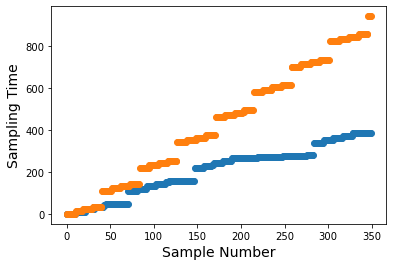

In [298]:
plt.scatter(range(len(dum[dum['Status'] == 'DCH'][:350])),dum[dum['Status'] == 'DCH']['time_diff_sec'][:350]/60)
plt.scatter(range(len(dum[dum['Status'] == 'CHA'][:350])),dum[dum['Status'] == 'CHA']['time_diff_sec'][:350]/60)
plt.ylabel('Sampling Time',size = 14)
plt.xlabel('Sample Number',size = 14)
plt.show()

In [314]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577003 entries, 2018-11-02 18:30:23 to 2018-11-08 19:13:22
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Step           577003 non-null  int64  
 1   Status         577003 non-null  object 
 2   Prog Time      577003 non-null  object 
 3   Step Time      577003 non-null  object 
 4   Cycle          577003 non-null  int64  
 5   Cycle Level    577003 non-null  int64  
 6   Procedure      577003 non-null  object 
 7   Voltage        577003 non-null  float64
 8   Current        577003 non-null  float64
 9   Temperature    577003 non-null  float64
 10  Capacity       577003 non-null  float64
 11  WhAccu         577003 non-null  float64
 12  Cnt            577003 non-null  float64
 13  time_diff_sec  577003 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 82.2+ MB


In [317]:
df_sorted['Step Time'] = pd.to_datetime(df_sorted['Step Time'], format='%H:%M:%S.%f').dt.time

In [318]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577003 entries, 2018-11-02 18:30:23 to 2018-11-08 19:13:22
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Step           577003 non-null  int64  
 1   Status         577003 non-null  object 
 2   Prog Time      577003 non-null  object 
 3   Step Time      577003 non-null  object 
 4   Cycle          577003 non-null  int64  
 5   Cycle Level    577003 non-null  int64  
 6   Procedure      577003 non-null  object 
 7   Voltage        577003 non-null  float64
 8   Current        577003 non-null  float64
 9   Temperature    577003 non-null  float64
 10  Capacity       577003 non-null  float64
 11  WhAccu         577003 non-null  float64
 12  Cnt            577003 non-null  float64
 13  time_diff_sec  577003 non-null  float64
dtypes: float64(7), int64(3), object(4)
memory usage: 82.2+ MB


In [302]:
df_sorted['Prog Time'][1]-df_sorted['Prog Time'][0]

Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,time_diff_sec
2018-11-02 18:30:23,2,DCH,03:29:33.069,00:00:00.199,1,1,HPPC_4pulse,4.13171,-3.00106,38.17255,-0.00008,-0.00034,12.0,0.0
2018-11-02 18:30:23,2,DCH,03:29:32.971,00:00:00.101,1,1,HPPC_4pulse,4.14722,-3.00361,38.17255,0.00000,0.00000,12.0,0.0
2018-11-02 18:30:24,2,DCH,03:29:34.071,00:00:01.201,1,1,HPPC_4pulse,4.12042,-2.99850,38.17255,-0.00092,-0.00378,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.972,00:00:01.102,1,1,HPPC_4pulse,4.12092,-2.99850,38.17255,-0.00083,-0.00343,12.0,1.0
2018-11-02 18:30:24,2,DCH,03:29:33.870,00:00:01.000,1,1,HPPC_4pulse,4.12126,-2.99850,38.17255,-0.00075,-0.00308,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-08 19:09:44,4,CHA,22:01:54.804,00:06:00.001,0,0,NN_Char_Charge,4.19979,0.10216,22.92456,0.03167,0.13303,7.0,520761.0
2018-11-08 19:10:44,4,CHA,22:02:54.804,00:07:00.001,0,0,NN_Char_Charge,4.19979,0.08173,23.02972,0.03317,0.13932,7.0,520821.0
2018-11-08 19:11:44,4,CHA,22:03:54.805,00:08:00.002,0,0,NN_Char_Charge,4.19979,0.06641,23.02972,0.03439,0.14444,7.0,520881.0
2018-11-08 19:12:45,4,CHA,22:04:54.805,00:09:00.002,0,0,NN_Char_Charge,4.19979,0.05619,23.13488,0.03540,0.14868,7.0,520942.0
